## Using Keras to Build and Train Neural Networks

In this assignment you will use a neural network to predict diabetes using the Pima Diabetes Dataset.  You will use the Keras package to quickly build and train a neural network and compare the performance. 


## UCI Pima Diabetes Dataset

* UCI ML Repositiory (http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes)

### Attributes: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

The UCI Pima Diabetes Dataset which has 8 numerical predictors and a binary outcome.

## Questions

### Part 1: Build a Baseline Model

Use the Sequential model to quickly build a baseline neural network with one single hidden layer with 12 nodes.\

1 Read and load data into Python \
2 Explore and pre-process the dataset \
3 Split the data to training and testing dataset (75%, 25%)\
4 Build the baseline model and find how many parameters does your model have?\
5 Train you model with 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128\
6 Graph the trajectory of the loss functions, accuracy on both train and test set.\
7 Evaluate and interpret the accuracy and loss performance during training, and testing. 

### Part 2: Find the Best Model

Now  try four different models and see if you can improve the accuracy by focusing on different network structures (i.e, activation functions, optimization algorithms, batch sizes, number of epochs, ...), affecting the performance, training time, and level of overfitting (or underfitting).

8. For all your models, plot the ROC curve for the predictions.
9. Which model has best performance, why?
10. Save your best model weights into a binary file.


Submit two files: the Jupyter notebook with your code and answers and its print out PDF.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
df = pd.read_csv('C:/Users/zhouy/Desktop/DAAN570/pima-indians-diabetes.csv', header = None)
df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age','Outcome']
#df.head(5) 
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [2]:
# Given the fact that Glucose, BloodPressue, SkinThickness, Insulin, BMI cannot be zero, drop all rows with NaN
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
#df.head(5)
df.isnull().sum()

# Code cited from datarohitingole - fill missing NaN with medium depends on the outcomes
# Gets two Median Valuse for Both Outcomes Seprately
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

median_target('Insulin')
df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin'] = 102.5
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()), 'Insulin'] = 169.5

median_target('Glucose')
df.loc[(df['Outcome'] == 0 ) & (df['Glucose'].isnull()), 'Glucose'] = 107
df.loc[(df['Outcome'] == 1 ) & (df['Glucose'].isnull()), 'Glucose'] = 140

median_target("SkinThickness")
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 27
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 32

median_target('BloodPressure')
df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 70
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

median_target('BMI')
df.loc[(df['Outcome'] == 0 ) & (df['BMI'].isnull()), 'BMI'] = 30.1
df.loc[(df['Outcome'] == 1 ) & (df['BMI'].isnull()), 'BMI'] = 34.3
### End of citation for filling missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 268.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

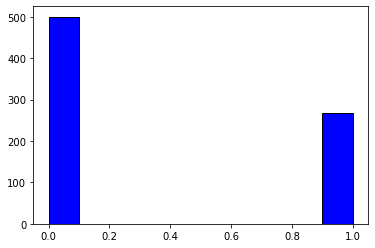

In [3]:
# Assess the imbalanceness of the outcome by ploting a histogram
plt.hist(df['Outcome'], color = 'blue', edgecolor = 'black')

In [4]:
X = df.drop("Outcome", axis=1).values
y = df.Outcome
#3 Split the data to training and testing dataset (75%, 25%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [5]:
# Use the Sequential model to quickly build 
# a baseline neural network with one single hidden layer with 12 nodes.
import tensorflow as tf
model1 = tf.keras.Sequential()
model1.add(layers.Dense(12, input_shape=(8,), activation = 'relu'))
model1.add(layers.Dense(1, activation = 'sigmoid'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


## Question 4
## Accoding to the output, we have 121 parameters.

In [6]:
#5 Train you model with 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model1.compile(optimizer = opt,loss='binary_crossentropy', metrics =['accuracy'])
#model.summary()

In [7]:
#Graph the trajectory of the loss functions, accuracy on both train and test set.
history1= model1.fit(X_train, y_train, epochs = 20, batch_size = 128, validation_data=(X_test,y_test),verbose=0)

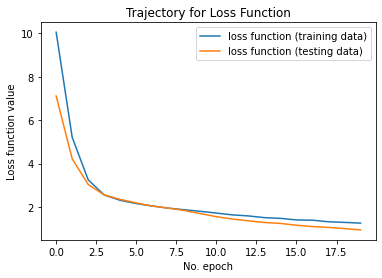

In [8]:
# Plot loss function

plt.plot(history1.history['loss'], label='loss function (training data)')
plt.plot(history1.history['val_loss'], label='loss function (testing data)')

plt.title('Trajectory for Loss Function')
plt.ylabel('Loss function value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

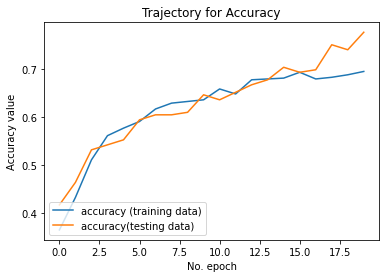

In [9]:
plt.plot(history1.history['accuracy'],label = 'accuracy (training data)')
plt.plot(history1.history['val_accuracy'], label = 'accuracy(testing data)')
plt.title('Trajectory for Accuracy')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="lower left")


In [10]:
# evaluate model on test set
score = model1.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("")

6/6 [==============================] - 0s 1ms/step - loss: 0.9404 - accuracy: 0.7760
Test loss: 0.9404351115226746
Test accuracy: 0.7760416865348816



## Evaluate and interpret the accuracy and loss performance during training, and testing. 
Looking at the loss function trajectory, both training and testing are moving in the same direction, although with small differences, suggesting that the model is not overfitting, and is continuously doing better as the number of epches increases.
However, the accuracy trajectory is somewhat difficult to interpret because it goes up and dones during the training and testing. Overall we do see a higher accuracy in the training data compared to the testing data (about .1 differences), it could be a suggesting of overfitting. Given that the imbalance nature of the dataset, if we guess everything as non-diabetes, the accuracy is still around .6; so we may need to use other evaluation metrics to access the performance of our model.

In [11]:
#Now  try four different models and see if you can improve the accuracy 
#by focusing on different network structures (i.e, activation functions, 
#optimization algorithms, batch sizes, number of epochs, ...), affecting the performance, training time, and level of overfitting (or underfitting).

#8. For all your models, plot the ROC curve for the predictions.
#9. Which model has best performance, why?
#10. Save your best model weights into a binary file.

# model#2 adding another hidden layer
model2 = tf.keras.Sequential()
model2.add(layers.Dense(12, input_shape=(8,), activation = 'relu'))
model2.add(layers.Dense(5, activation ='relu'))
model2.add(layers.Dense(1, activation = 'sigmoid'))
model2.summary()
#5 Train you model with 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model2.compile(optimizer = opt,loss='binary_crossentropy', metrics =['accuracy'])
#model.summary()
#Graph the trajectory of the loss functions, accuracy on both train and test set.
history2= model2.fit(X_train, y_train, epochs = 20, batch_size = 128, validation_data=(X_test,y_test),verbose=0)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 65        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 179
Trainable params: 179
Non-trainable params: 0
_________________________________________________________________


In [12]:
#model3 based on previous model, change the loss function to mse
model3 = tf.keras.Sequential()
model3.add(layers.Dense(12, input_shape=(8,), activation = 'relu'))
model3.add(layers.Dense(5, activation ='relu'))
model3.add(layers.Dense(1, activation = 'sigmoid'))
model3.summary()
#5 Train you model with 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model3.compile(optimizer = opt,loss='mse', metrics =['accuracy'])
#model.summary()
#Graph the trajectory of the loss functions, accuracy on both train and test set.
history3= model3.fit(X_train, y_train, epochs = 20, batch_size = 128, validation_data=(X_test,y_test),verbose=0)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 65        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 6         
Total params: 179
Trainable params: 179
Non-trainable params: 0
_________________________________________________________________


In [13]:
#model4 change epochs to 30
model4 = tf.keras.Sequential()
model4.add(layers.Dense(12, input_shape=(8,), activation = 'relu'))
model4.add(layers.Dense(5, activation ='relu'))
model4.add(layers.Dense(1, activation = 'sigmoid'))
model4.summary()
#5 Train you model with 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model4.compile(optimizer = opt,loss='mse', metrics =['accuracy'])
#model.summary()
#Graph the trajectory of the loss functions, accuracy on both train and test set.
history4= model4.fit(X_train, y_train, epochs = 30, batch_size = 128, validation_data=(X_test,y_test),verbose=0)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 65        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 6         
Total params: 179
Trainable params: 179
Non-trainable params: 0
_________________________________________________________________


In [14]:
#model2 based on previuos model change the learning rate to 0.0002
model5 = tf.keras.Sequential()
model5.add(layers.Dense(12, input_shape=(8,), activation = 'relu'))
model5.add(layers.Dense(5, activation ='relu'))
model5.add(layers.Dense(1, activation = 'sigmoid'))
model5.summary()
#5 Train you model with 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
opt = tf.keras.optimizers.RMSprop(learning_rate=0.0002)
model5.compile(optimizer = opt,loss='mse', metrics =['accuracy'])
#model.summary()
#Graph the trajectory of the loss functions, accuracy on both train and test set.
history5= model5.fit(X_train, y_train, epochs = 30, batch_size = 128, validation_data=(X_test,y_test),verbose=0)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 65        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 6         
Total params: 179
Trainable params: 179
Non-trainable params: 0
_________________________________________________________________


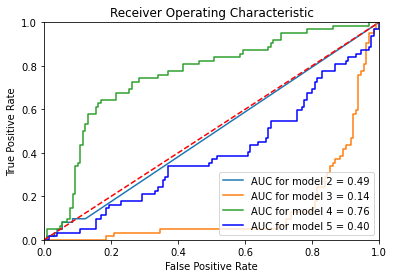

In [15]:
from sklearn.metrics import roc_curve
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)
y_pred4 = model4.predict(X_test)
y_pred5 = model5.predict(X_test)

fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred2)
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred3)
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_pred4)
fpr5, tpr5, thresholds5 = roc_curve(y_test, y_pred5)
from sklearn.metrics import auc

auc2 = auc(fpr2, tpr2)
auc3 = auc(fpr3, tpr3)
auc4 = auc(fpr4, tpr4)
auc5 = auc(fpr5, tpr5)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')

plt.plot(fpr2,tpr2,label = 'AUC for model 2 = %0.2f' % auc2)
plt.plot(fpr3,tpr3,label = 'AUC for model 3 = %0.2f' % auc3)
plt.plot(fpr4,tpr4,label = 'AUC for model 4 = %0.2f' % auc4)
plt.plot(fpr5, tpr5, 'b', label = 'AUC for model 5 = %0.2f' % auc5)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 9. Which model has best performance, why?
My model number 4 has the best performance because it has the best ROC curve with AUC = 0.76 (largest); ROC and AUC is calculated using confusion matrixes with different thresholds. It is clearly better than just calling everyone non-diabetes, as suggested in the ROC curve. The large AUC suggests which categorization methods are better, suggesting model4 is the best among all four alternations. 

In [16]:
#Save your best model weights into a binary file.
model4.save_weights('mlp.params')